In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load layoffs data
layoffs = pd.read_csv("../data/layoffs.csv", parse_dates=["Date"])

# Load job postings
jobs = pd.read_csv("../data/job_postings.csv", parse_dates=["date"])


In [5]:
layoffs.head(5)

,Company,Location HQ,# Laid Off,Date,%,Industry,Source,Stage,$ Raised (mm),Country,Date Added
0,Business Insider,New York City,NaN,2025-05-29,20%,Media,https://www.adweek.com/media/business-insider-...,Acquired,$56,United States,6/1/2025
1,eBay,"Tel Aviv,Non-U.S.",200.0,2025-05-28,NaN,Retail,https://www.calcalistech.com/ctechnews/article...,Post-IPO,$1200,Israel,6/1/2025
2,Cars24,"Gurugram,Non-U.S.",120.0,2025-05-27,NaN,Transportation,https://inc42.com/buzz/cars24-to-fire-120-more...,Series G,$1300,India,5/28/2025
3,nCino,Wilmington,NaN,2025-05-27,7%,Finance,https://www.housingwire.com/articles/ncino-wor...,Post-IPO,$1100,United States,5/28/2025
4,Otipy,"New Delhi,Non-U.S.",300.0,2025-05-23,100%,Food,https://economictimes.indiatimes.com/tech/star...,Series B,$44,India,5/27/2025


In [6]:
jobs.head(5)

,job_title,industry,skills,salary,location,date
0,Software Engineer,Software,"Node.js, JavaScript, PostgreSQL",84324,New York,2022-08-14
1,Data Scientist,FinTech,"Scikit-learn, Pandas, NLP",92900,New York,2022-05-20
2,Software Engineer,FinTech,"PostgreSQL, JavaScript, Node.js",136354,Remote,2023-07-29
3,Business Analyst,Software,"SQL, Excel, Stakeholder Management",155738,London,2023-11-11
4,DevOps Engineer,FinTech,"AWS, Docker, Kubernetes",88200,Remote,2022-11-03


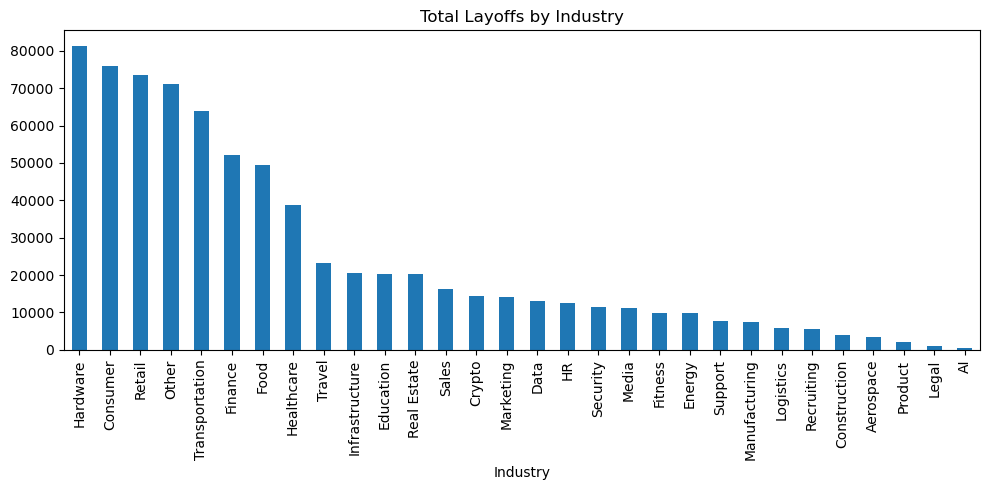

In [9]:
# Layoffs by industry
layoffs_by_industry = layoffs.groupby("Industry")["# Laid Off"].sum().sort_values(ascending=False)
layoffs_by_industry.plot(kind="bar", title="Total Layoffs by Industry", figsize=(10,5))
plt.tight_layout()
plt.show()


<Axes: xlabel='Date'>

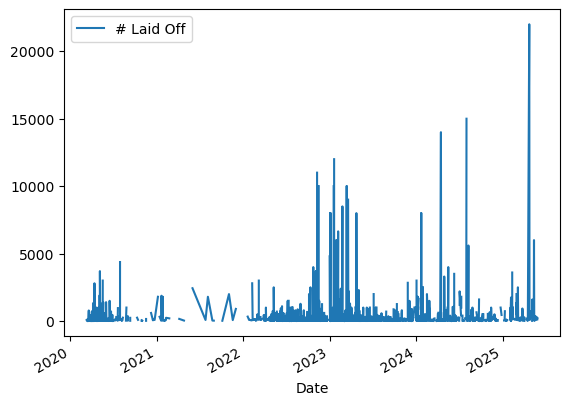

In [10]:
#Layoffs over Time
layoffs.plot.line(x='Date',y='# Laid Off')

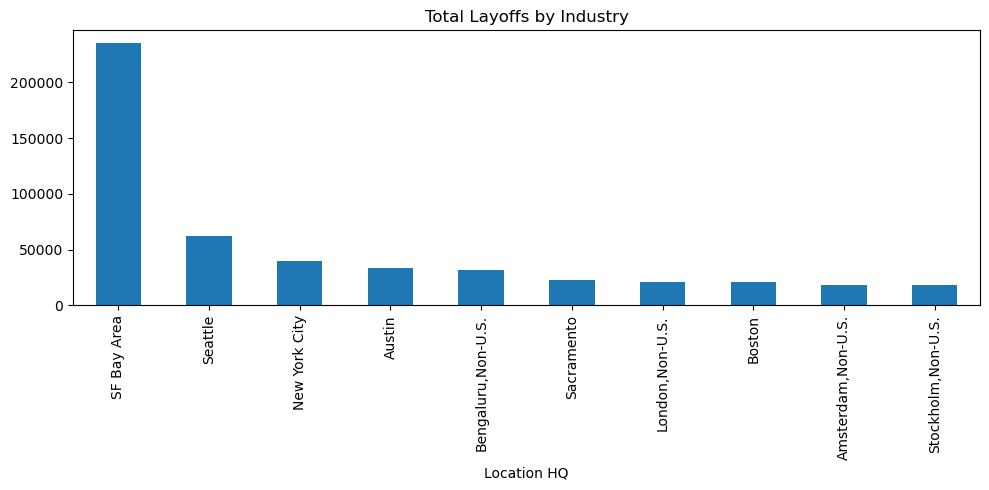

In [14]:
layoffs_by_location = layoffs.groupby("Location HQ")["# Laid Off"].sum().sort_values(ascending=False)
layoffs_by_location.head(10).plot(kind="bar", title="Total Layoffs by Industry", figsize=(10,5))
plt.tight_layout()
plt.show()

job_title
Data Scientist       36
DevOps Engineer      24
ML Engineer          24
Software Engineer    22
Business Analyst     22
Name: count, dtype: int64


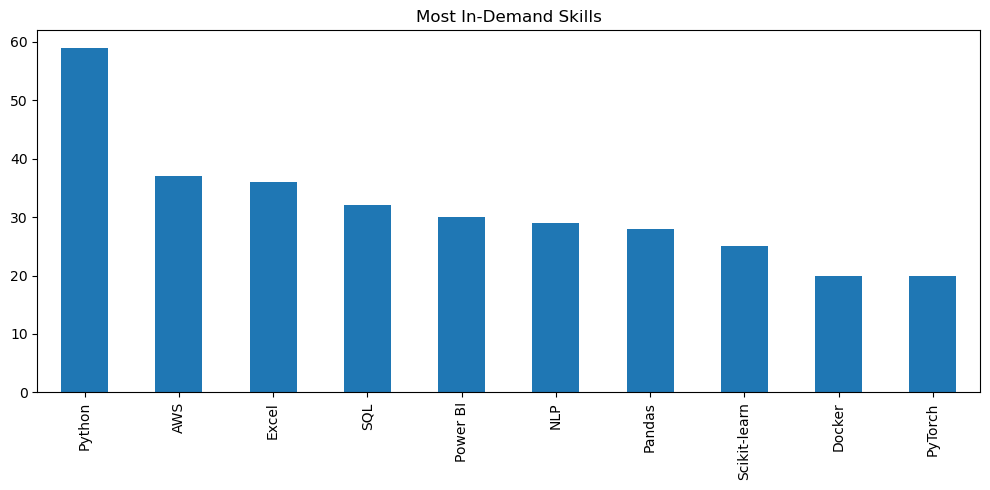

In [15]:
# Top job titles
print(jobs["job_title"].value_counts().head())

# Top skills
from collections import Counter
skills = jobs["skills"].dropna().str.split(",").explode().str.strip()
top_skills = pd.Series(Counter(skills)).sort_values(ascending=False).head(10)
top_skills.plot(kind="bar", title="Most In-Demand Skills", figsize=(10,5))
plt.tight_layout()
plt.show()
